In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
sp500_data = yf.download('^GSPC',  period="5y") 

sp500_closing_prices = sp500_data['Close']

sp500_closing_prices = pd.DataFrame(sp500_closing_prices)
sp500_closing_prices.columns = ['SP500']
sp500_returns = sp500_closing_prices.pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed


In [126]:
# Get portfolio information from a user, define period user analisys and fetch closing prices for a portfolio
portfolio = {}

while True:
    stock = input("Enter a stock symbol (or 'done' to finish): ").upper()
    if stock == 'DONE':
        break
    quantity = int(input(f"Enter the quantity of {stock}: "))
    portfolio[stock] = quantity
portfolio_tickers = list(portfolio.keys())
stock_shares = list(portfolio.values())
historical_data = {}

for stock_symbol in portfolio.keys():
    stock_data = yf.download(stock_symbol, period="5y")
    historical_data[stock_symbol] = stock_data['Close']

#Change dataframe to pandas
historical_df = pd.DataFrame(historical_data)

#Calculate portfolio daily returns and drop na
portfolio_returns = historical_df.pct_change().dropna()

Enter a stock symbol (or 'done' to finish):  msft
Enter the quantity of MSFT:  20
Enter a stock symbol (or 'done' to finish):  aapl
Enter the quantity of AAPL:  40
Enter a stock symbol (or 'done' to finish):  cost
Enter the quantity of COST:  50
Enter a stock symbol (or 'done' to finish):  googl
Enter the quantity of GOOGL:  10
Enter a stock symbol (or 'done' to finish):  amzn
Enter the quantity of AMZN:  10
Enter a stock symbol (or 'done' to finish):  xom
Enter the quantity of XOM:  10
Enter a stock symbol (or 'done' to finish):  done


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [129]:
portfolio

{'MSFT': 20, 'AAPL': 40, 'COST': 50, 'GOOGL': 10, 'AMZN': 10, 'XOM': 10}

In [130]:
stock_shares

[20, 40, 50, 10, 10, 10]

In [128]:
portfolio_tickers

['MSFT', 'AAPL', 'COST', 'GOOGL', 'AMZN', 'XOM']

In [127]:
def portfolio_value(portfolio_tickers, stock_shares):
    try:
        # Concatenate tickers into a comma-separated string
        #tickers_str = ' '.join(portfolio_tickers)
        
        # Download historical stock prices
        data = yf.download(portfolio_tickers, period="1d")['Close']
        
        # Get the latest prices
        current_prices = data.iloc[-1]
        
        # Calculate the value of each stock
        stock_values = current_prices * pd.Series(portfolio)
        
        # Calculate the total portfolio value
        portfolio_value = stock_values.sum()
        
        return portfolio_value
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None


# Calculate portfolio value
current_portfolio_value = portfolio_value(portfolio_tickers, stock_shares)
current_prices = get_current_prices(portfolio)

print(f"\nCurrent Portfolio Value: ${current_portfolio_value:.2f}")
current_prices.reset_index()

[*********************100%%**********************]  6 of 6 completed



2 Failed downloads:
['COST', 'AMZN']: Exception('%ticker%: No price data found, symbol may be delisted (period=1d)')


[*********************100%%**********************]  6 of 6 completed

Current Portfolio Value: $17578.20


,index,2023-12-14 00:00:00
0,AAPL,198.110001
1,AMZN,147.419998
2,COST,630.780029
3,GOOGL,131.940002
4,MSFT,365.929993
5,XOM,101.580002


<Axes: title={'center': 'Portfolio Cumulative Returns vs Market (Sp 500)'}, xlabel='Date', ylabel='Return'>

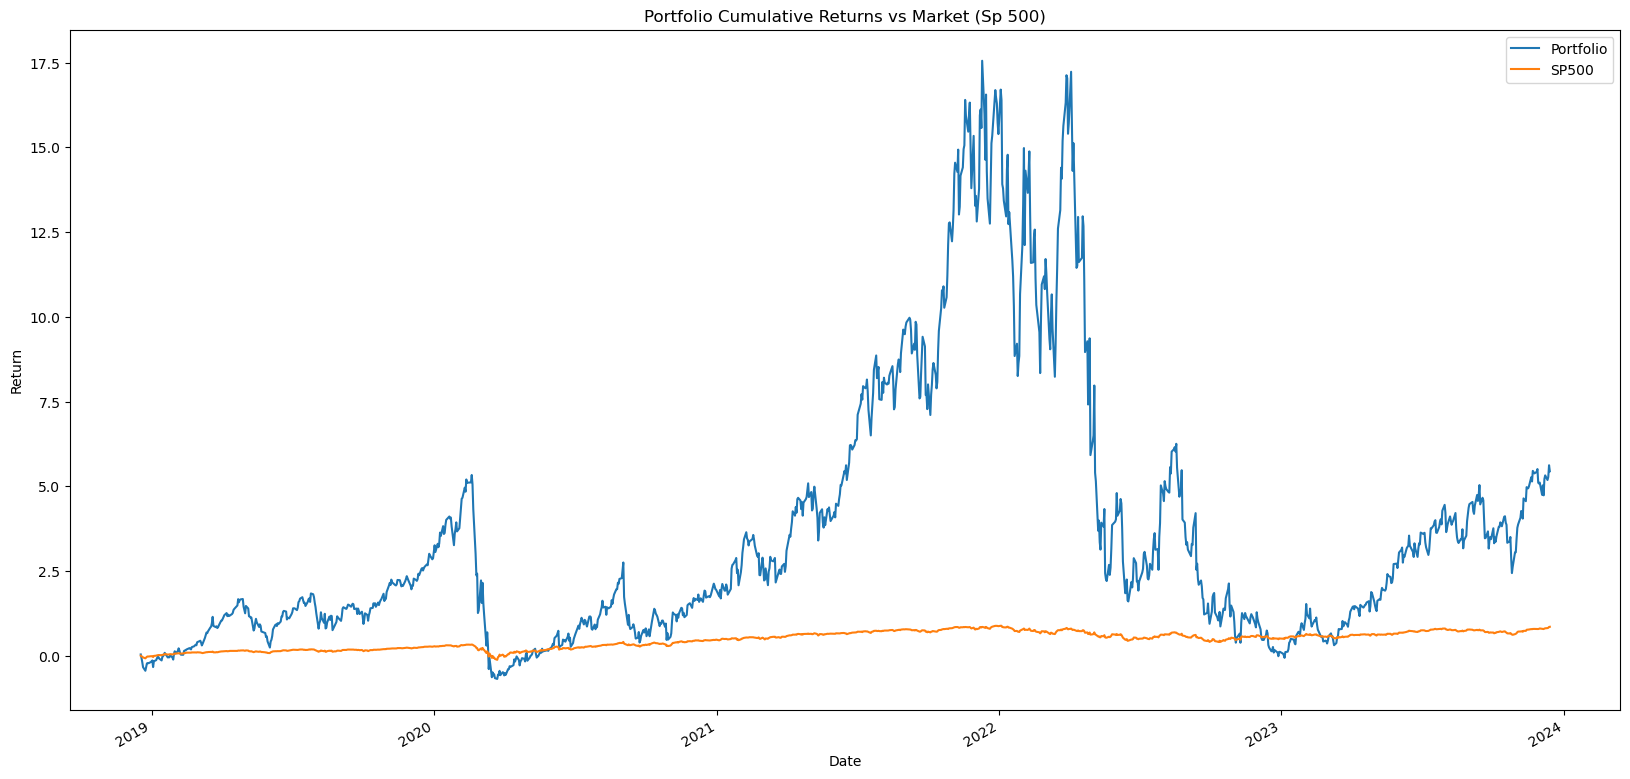

In [132]:
combined_return = portfolio_returns.sum(axis=1)
cumulative_portfolio_returns = (1 + combined_return).cumprod() - 1
ax = cumulative_portfolio_returns.plot(figsize=(20,10), 
                        ylabel='Return',
                        title='Portfolio Cumulative Returns vs Market (Sp 500)',
                        label='Portfolio',
                        legend=True)
cumulative_spy500_returns = (1 + sp500_returns).cumprod() - 1
cumulative_spy500_returns.plot(ax=ax, label='SP500', legend=True)

<Axes: title={'center': 'Market (Sp500) Returns'}, xlabel='Date'>

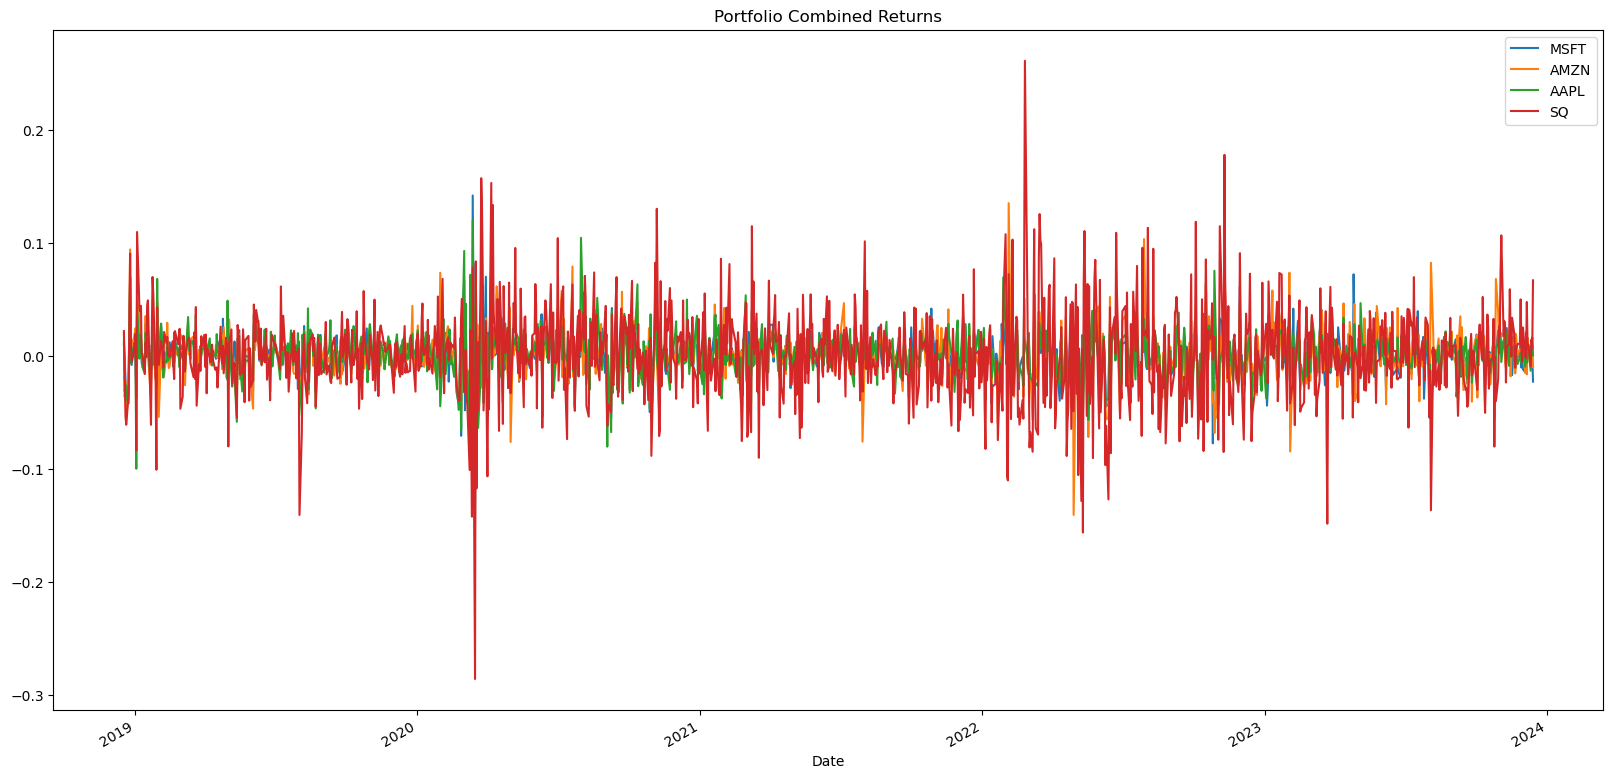

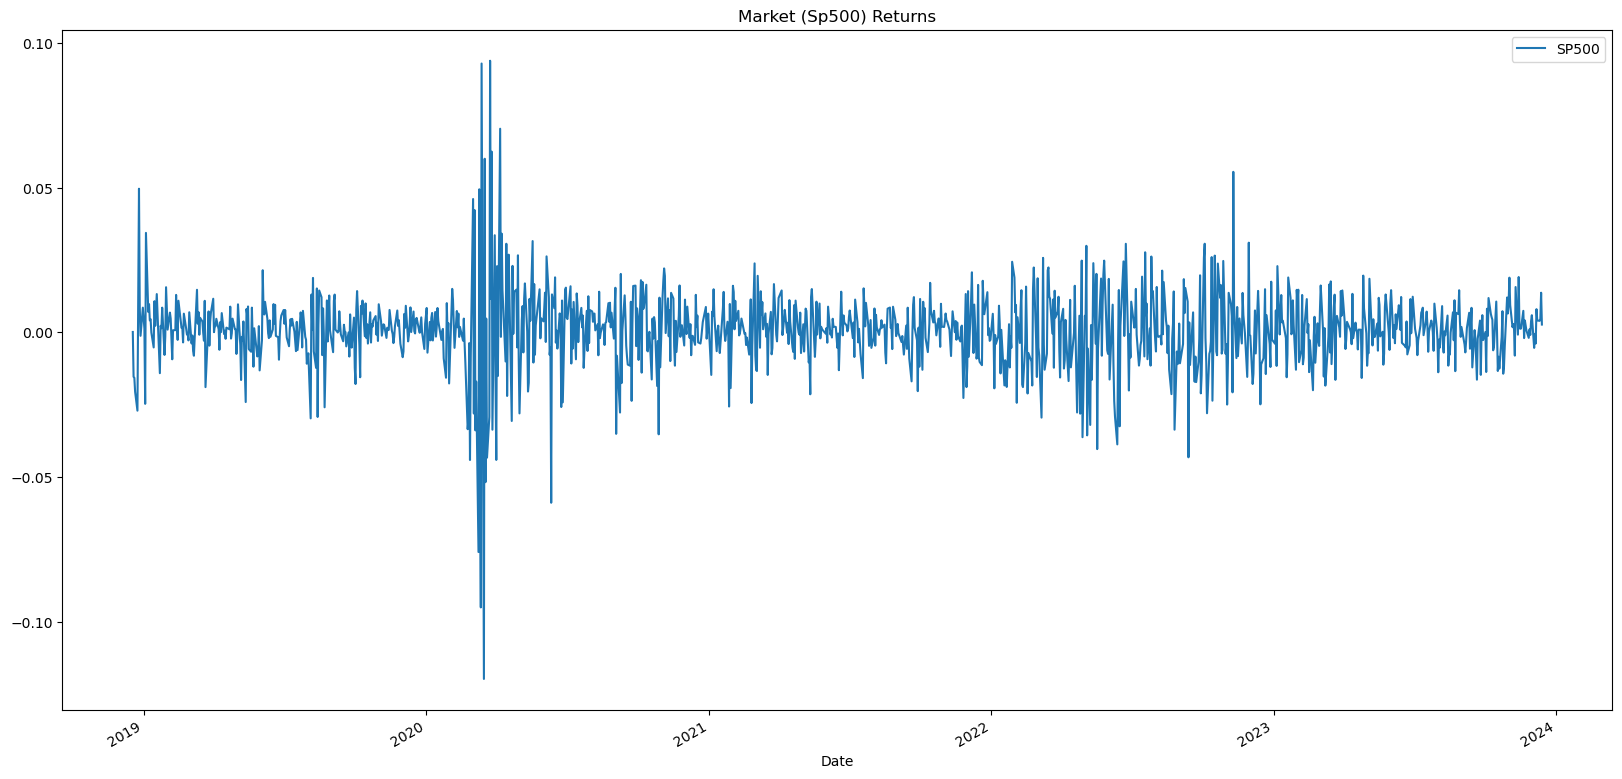

In [125]:
portfolio_returns.plot(figsize=(20,10),title='Portfolio Combined Returns', legend=True)
sp500_returns.plot(figsize=(20,10),title='Market (Sp500) Returns', legend=True)